In [1]:
#Autor: Iaslan Nascimento
#25/11/19
#código para detecção de memes utilizando a abordagem SIFT para matching de pontos
#adição dia 26/11/19
#Porcentagem de matching e verificação de boas caracteristicas entre imagens.
#Mudança dia 26/11/19
#leitura de diversos memes ao mesmo tempo 
import numpy as np
import cv2 
import glob
import matplotlib.pyplot as plt

52.41581259150805


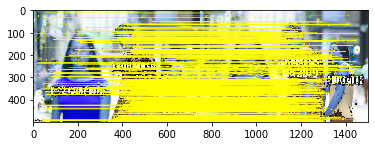

52.22059541239629


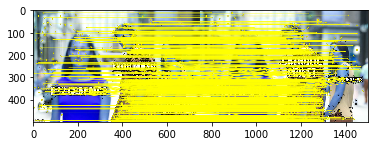

55.29526598340654


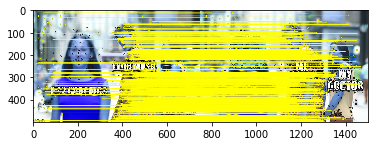

56.27135187896535


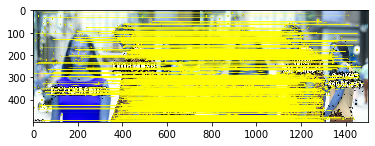

56.90580771107857


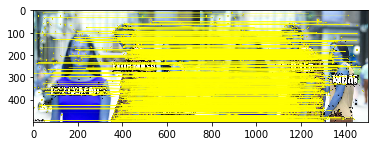

57.58906783796974


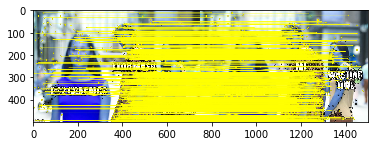

57.05222059541239


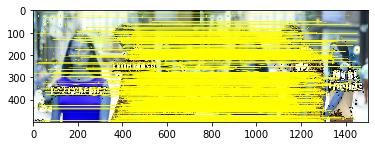

59.297218155197655


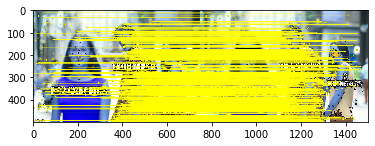

44.496175590289326


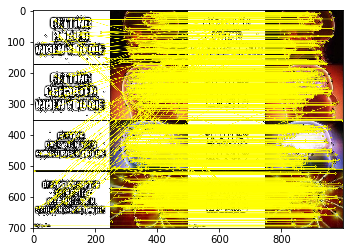

50.182906551380114


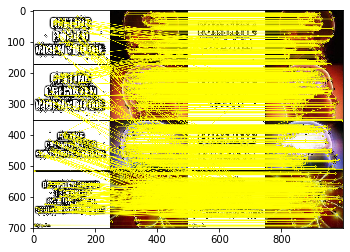

32.1915530428999


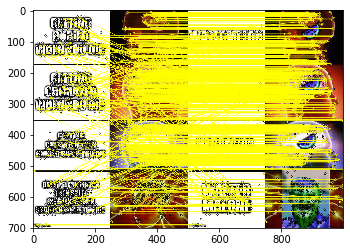

47.422680412371136


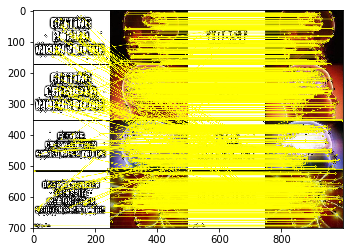

49.151978716328564


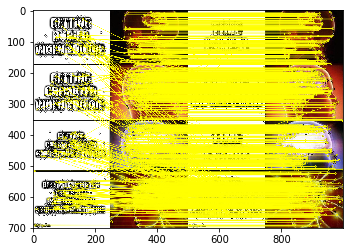

44.861988693049554


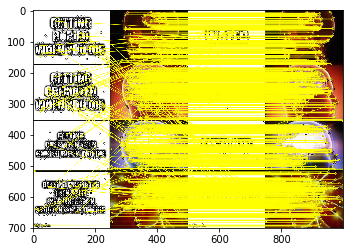

41.86897239773861


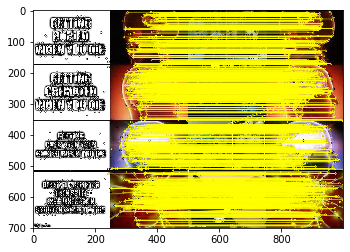

43.38153503893215


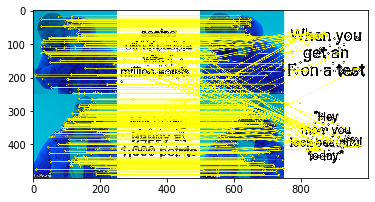

40.7119021134594


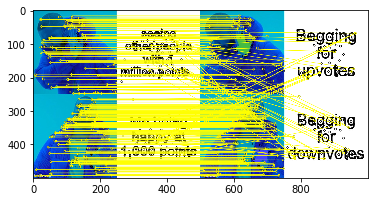

41.045606229143495


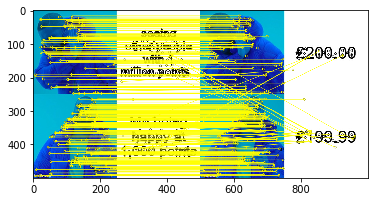

36.70745272525028


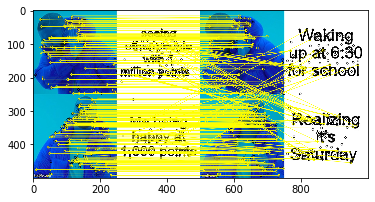

48.60956618464961


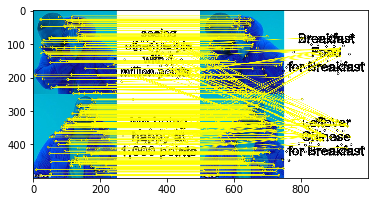

41.37931034482759


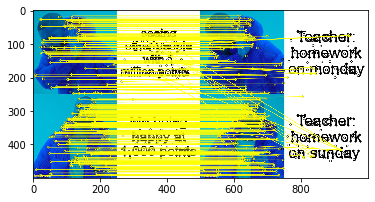

41.37931034482759


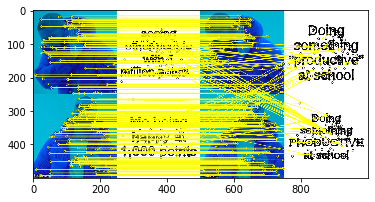

43.72670807453416


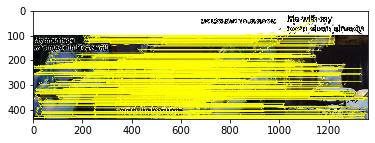

34.72049689440994


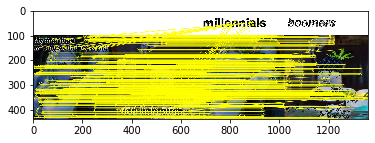

44.409937888198755


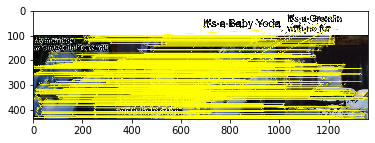

41.67701863354037


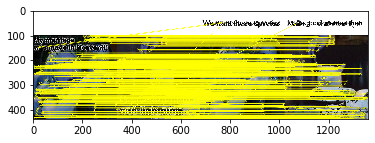

41.98757763975155


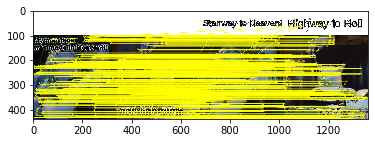

41.80124223602485


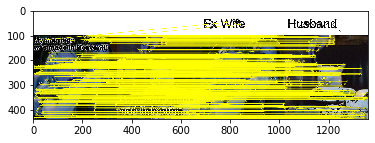

48.994974874371856


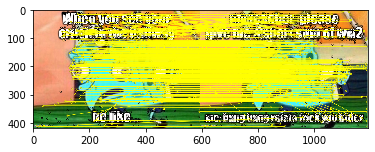

44.97487437185929


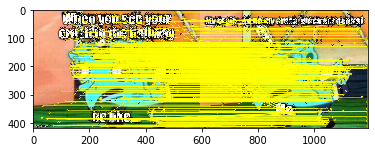

41.79229480737018


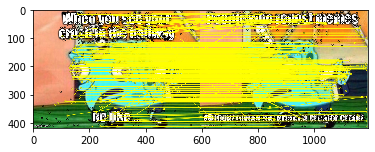

32.32830820770519


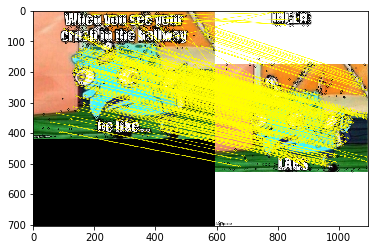

43.802345058626464


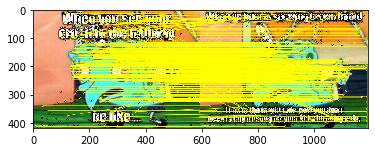

45.05862646566164


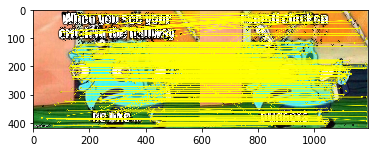

68.39772007599747


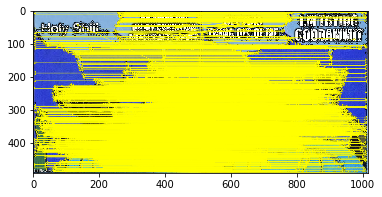

77.42241925269158


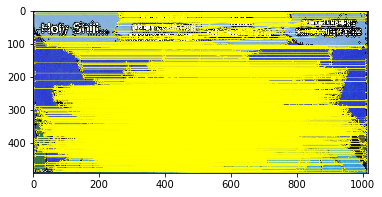

In [2]:
for filename in glob.glob('imagensBase/*.jpg'):
    sift = cv2.xfeatures2d.SIFT_create()
    im1 = cv2.imread(filename)
    for files in glob.glob('TodosMemes/*.jpg'):
        im2 = cv2.imread(files)
        #encontrando pontos chave e descrições com sift
        kp1,des1 = sift.detectAndCompute(im1,None)
        kp2,des2 = sift.detectAndCompute(im2,None)

        #chamando as funções FLANN que possuem diversos algoritmos de optimização para os vizinhos mais próximos
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
        search_params = dict(checks=50)

        flann = cv2.FlannBasedMatcher(index_params,search_params)
        matches = flann.knnMatch(des1,des2,k=2)
        matchesMask = [[0,0] for i in range(len(matches))]

        #quantidade minima de matches necessária para uma boa confirmação
        qtdMinMatches = 50
        #vetor para armazenar apenas as boas caracteristicas
        good = []
        #pontos da imagem base 
        pontosBase = len(kp1)
        for i,(m,n) in enumerate(matches):
            if m.distance < 0.7*n.distance:
                matchesMask[i]=[1,0]
                good.append(m) 
        
        if len(good) > qtdMinMatches:
    
            bons = len(good)
            resultado = bons * 100/pontosBase
            if resultado > 30: 
                print(resultado)
    
    
                draw_params = dict(matchColor = (255,255,0), singlePointColor = (0,0,0), matchesMask = matchesMask, flags = cv2.DrawMatchesFlags_DEFAULT)
                im3 = cv2.drawMatchesKnn(im1,kp1,im2,kp2,matches,None,**draw_params)
                plt.imshow(im3),plt.show()
        